In [151]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 시계열 데이터

## 시계열 데이터 소개 (datetime)

In [152]:
from datetime import datetime
from datetime import timedelta

In [153]:
now = datetime.now()
now

datetime.datetime(2019, 7, 19, 16, 38, 42, 134425)

<img src="img/예제실습/datetime.jpg" alt="datetime" style="width: 1200px;"/>

In [154]:
now.hour

16

In [155]:
now.year

2019

In [156]:
# now 변수의 4주후 날짜 계산
now + timedelta(weeks=4)

datetime.datetime(2019, 8, 16, 16, 38, 42, 134425)

In [157]:
now + timedelta(days=100)

datetime.datetime(2019, 10, 27, 16, 38, 42, 134425)

In [158]:
now + timedelta(hours=5,minutes=30)

datetime.datetime(2019, 7, 19, 22, 8, 42, 134425)

In [159]:
# 편리한 색인
import random 
sample = DataFrame()
sample['date'] = pd.date_range(start='20190701',periods=500)
sample['count'] = random.sample(range(1,1000),500)
sample.head()

,date,count
0,2019-07-01,469
1,2019-07-02,567
2,2019-07-03,998
3,2019-07-04,241
4,2019-07-05,386


In [160]:
sample.dtypes

date     datetime64[ns]
count             int64
dtype: object

In [161]:
# 2019년 8월 데이터만 선택
# 첫번째 방법
sample[sample['date'].isin(pd.date_range(start='2019-08-01',end='2019-08-31'))].head()

,date,count
31,2019-08-01,317
32,2019-08-02,693
33,2019-08-03,166
34,2019-08-04,363
35,2019-08-05,69


In [162]:
# 두번째 방법
# date 컬럼을 row index로 변경한 후 색인
sample.set_index('date',inplace=True)

In [163]:
sample['2019-08'].head()

,count
date,
2019-08-01,317
2019-08-02,693
2019-08-03,166
2019-08-04,363
2019-08-05,69


In [164]:
sample['2019-08'].tail()

,count
date,
2019-08-27,790
2019-08-28,888
2019-08-29,549
2019-08-30,307
2019-08-31,608


In [165]:
sample['2019'].head()

,count
date,
2019-07-01,469
2019-07-02,567
2019-07-03,998
2019-07-04,241
2019-07-05,386


In [166]:
sample['2019-08':'2019-11']

,count
date,
2019-08-01,317
2019-08-02,693
2019-08-03,166
2019-08-04,363
2019-08-05,69
2019-08-06,665
2019-08-07,547
2019-08-08,617
2019-08-09,840


```python
sample['2019-08-15'] # 이렇게 할순 없음 왜냐면 이러면 column으로 생각해서... slicing 
```

In [167]:
sample.loc['2019-08-15']

count    942
Name: 2019-08-15 00:00:00, dtype: int64

In [168]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2019-07-01 to 2020-11-11
Data columns (total 1 columns):
count    500 non-null int64
dtypes: int64(1)
memory usage: 27.8 KB


### strftime()으로 날짜 타입의 변수를 문자열로 변환하기

In [169]:
# now 변수를 2018-05-25 형식으로 출력
now.strftime('%Y-%m-%d')

'2019-07-19'

In [170]:
# 실습 - now 변수를 2018/05/25 11:20:30.231452 형식으로 출력
now.strftime('%Y/%m/%d %H:%M:%S.%f')

'2019/07/19 16:38:42.134425'

In [171]:
# 실습 2. now 변수를 2018년 5월 25일로 출력
# now.strftime('%연') 한글 인코딩이 안됨
# now.strftime('%Y년 %m월 %d일') # 인코딩 문제로 strftime 함수가 비정상 동작
# 이런 경우에는 format()을 이용하여 출력하는 것을 권장
'{0}년 {1}월 {2}일'.format(now.year, now.month, now.day)

'2019년 7월 19일'

In [172]:
'{0.year}년 {0.month}월 {0.day}일'.format(now)

'2019년 7월 19일'

In [173]:
# 심화 - week number, weeekday 정보가 필요할 때
# %U : week number(sun to mon)
now.strftime('%U') + '주차'

'28주차'

In [174]:
# %V : ISO 8601 week number (mon to sun)
now.strftime('%V') + '주차'

'29주차'

In [175]:
# %a : weekday
now.strftime('%a')

'Fri'

In [176]:
# %w : weekday(0,1,2,3,4...0:sun)
now.strftime('%w')

'5'

### strptime()으로 문자열을 날짜 타입으로 변환하기

In [183]:
sample = sample.reset_index()
date_str = '19/8/15'
datetime.strptime(date_str,'%y/%m/%d')

datetime.datetime(2019, 8, 15, 0, 0)

In [184]:
now

datetime.datetime(2019, 7, 19, 16, 38, 42, 134425)

In [185]:
sample.date[0].strftime('%U')

'26'

In [186]:
sample['date'].map(lambda x : x.strftime('%U'))[:5]

0    26
1    26
2    26
3    26
4    26
Name: date, dtype: object

## 예제 실습
### 예제1

In [194]:
# sample에 week number랑 week day 컬럼을 추가
# week number 별로 count 컬럼의 합과
# week day 별로 count 컬럼의 합을 구하기
# apply(lambda x : x.strftime('%U'))
sample['wn'] = sample['date'].map(lambda x : x.strftime('%U'))
sample['wn2']  = sample.date.dt.strftime('%U') # Series.dt 사용하기
sample['wd'] = sample['date'].map(lambda x : x.strftime('%a'))
sample['wd2']  = sample.date.dt.strftime('%a')
sample.head()

,date,count,wn,wd,wn2,wd2
0,2019-07-01,469,26,Mon,26,Mon
1,2019-07-02,567,26,Tue,26,Tue
2,2019-07-03,998,26,Wed,26,Wed
3,2019-07-04,241,26,Thu,26,Thu
4,2019-07-05,386,26,Fri,26,Fri


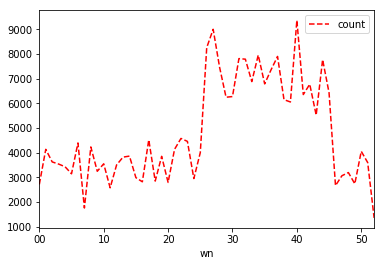

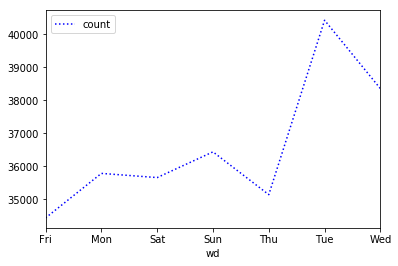

In [191]:
sample.pivot_table(index='wn',aggfunc='sum',values='count').plot(style='--',color='r')
sample.pivot_table(index='wd',aggfunc='sum',values='count').plot(kind='bar',style=':',color='b')
plt.show()

### 예제2 

In [211]:
df = DataFrame({'date':['2019-07-01','2019-07-07','2019-07-11','2019-07-13','2019-07-15',
                        '2019-07-18','2019-07-20','2019-07-21','2019-07-25','2019-07-29'],
                'count' : random.sample(range(1,100),10)})

In [212]:
pd.to_datetime(df['date'])

0   2019-07-01
1   2019-07-07
2   2019-07-11
3   2019-07-13
4   2019-07-15
5   2019-07-18
6   2019-07-20
7   2019-07-21
8   2019-07-25
9   2019-07-29
Name: date, dtype: datetime64[ns]

In [216]:
# df에서의 date를 string에서 datetime 로 변환
df['date2'] = df.date.map(lambda x : datetime.strptime(x,'%Y-%M-%d'))
df.set_index('date')

,count,date2
date,,
2019-07-01,28,2019-01-01 00:07:00
2019-07-07,79,2019-01-07 00:07:00
2019-07-11,46,2019-01-11 00:07:00
2019-07-13,45,2019-01-13 00:07:00
2019-07-15,65,2019-01-15 00:07:00
2019-07-18,6,2019-01-18 00:07:00
2019-07-20,38,2019-01-20 00:07:00
2019-07-21,87,2019-01-21 00:07:00
2019-07-25,12,2019-01-25 00:07:00


## 푸드코트 주문 데이터 분석

In [218]:
# 데이터 읽기
식당 = pd.read_excel('data/food_order.xlsx')

In [219]:
# 데이터 조회
식당

,date,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
0,2013-08-06,dinner,grill & fry,훈제연어벤또(200개),F,213,0,0,0,0,0,-213,2013,8,6,1
1,2013-08-06,dinner,rice & soup 1,뚝배기 우거지 갈비탕,F,261,0,0,0,0,0,-261,2013,8,6,1
2,2013-08-06,lunch,noodle bar,판모밀정식,F,267,0,0,0,0,0,-267,2013,8,6,1
3,2013-08-06,breakfast,rice & soup 1,설렁탕정식,F,1,0,0,0,0,0,-1,2013,8,6,1
4,2013-08-06,lunch,rice & soup 1,A. 부대찌개정식,F,376,0,0,0,0,0,-376,2013,8,6,1
5,2013-08-12,dinner,noodle bar,차슈라멘,F,179,0,0,0,0,0,-179,2013,8,12,0
6,2013-08-12,breakfast,rice & soup 1,뚝배기순대국,F,26,0,0,0,0,0,-26,2013,8,12,0
7,2013-08-12,lunch,rice & soup 1,A:누룽지장각백숙,F,504,0,0,0,0,0,-504,2013,8,12,0
8,2013-08-12,lunch,noodle bar,유니자장면,F,167,0,0,0,0,0,-167,2013,8,12,0
9,2013-08-12,dinner,rice & soup 1,김치날치알밥,F,216,0,0,0,0,0,-216,2013,8,12,0


In [ ]:
# 'date' 컬럼을 index label로 지정


In [ ]:
# 2014년 데이터만 선택하여 출력


In [ ]:
# 2015년 1월 데이터만 선택하여 출력


In [ ]:
# 2014년 8월 1일부터 2014년 9월 25일까지 데이터만 출력


In [ ]:
# 2015년 6월 30일 데이터만 출력


### date_range()를 활용한 고급 기법
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html

In [ ]:
# 특정 기간의 날짜 생성


In [ ]:
# start 날짜를 기준으로 periods 갯수만큼 날짜 생성


In [ ]:
#특정 주기로 날짜를 생성 - freq 인자
# 상세 내용은 https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases 확인


# D: 일단위
# W: 주 단위 (일요일만 선택)
# W-MON: 주 단위이되, 월요일만 선택
# W-TUE: 주 단위이되, 화요일만 선택. WED, THU, FRI, SAT, SUN 모두 가능
# M: 매달 마지막날만 선택
# MS: 매달 첫째날만 선택
# B: 주중만 선택 (Business day)

In [ ]:
# 식당 데이터 중 월요일 데이터만 선택하여 출력
# date_range()를 이용하여, 2013-08-06~ 2015-07-27까지 
# 1) 매주 월요일만 가지고 있는 리스트 생성
#매주월요일 = pd.date_range(start = '2013-08-06', end = '2015-7-27', freq = 'W-MON')


In [ ]:
# 2) 조건 색인을 이용하여, 매주월요일 데이터만 선택하여 출력


### 3. 전체 기간 동안, 가장 많은 판매량을 올렸던 날 찾기

In [ ]:
# 분석 실습
# 1. 전체 기간 동안, 가장 많은 판매량을 올렸던 날 찾기
# 2. 전체 기간 동안, 아침, 점심, 저녁 메뉴로 가장 인기 있었던 메뉴를 각각 착기
# 3. 2014년 한 해 동안 가장 많은 판매량을 올린 메뉴 찾기
# 4. 2014년 한 해 동안 각 코너 별로 판매량을 그래프로 표현

### 4. (실습 1) 전체 기간 동안, 아침, 점심, 저녁 메뉴로 가장 인기 있었던 메뉴를 각각 착기

### 5. (실습 2) 2014년 한 해 동안, 각 코너 별  월별 판매량을 그래프로 시각화하기 

### 6. (실습 3) 매진을 가장 많이 기록한 상위 10개 메뉴와 매진횟수를 출력